<a href="https://colab.research.google.com/github/namanphy/EVA5/blob/main/S8/cifar10_resnet18_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting up code

#### Cloning the required [repository](https://github.com/namanphy/EVA5/) and adding the path to the code directory.

In [1]:
# import shutil
import sys

# shutil.rmtree('EVA5', ignore_errors=True)

! git clone https://github.com/namanphy/EVA5.git
sys.path.append('EVA5/S8/')

fatal: destination path 'EVA5' already exists and is not an empty directory.


#### Importing the required modules and files

In [2]:
import cuda
from data.dataset import cifar10_dataset, transformations
from data.dataloader import data_loader
from model.utils import set_seed, plot_metric, identify_misclassification, plot_results
from model.model import ResNet18, model_summary
from model.functions import sgd_optimizer, cross_entropy_loss
from model.trainer import Trainer

In [3]:
set_seed(123)
use_cuda = cuda.cuda_is_available()
# device = cuda.enable_cuda()

## Making the data ready

In [4]:
?? transformations

In [9]:
transforms = transformations(augmentation=True, rotation=3.0, randomHorizontalFlip=True)

train_set = cifar10_dataset('../data', train=True, transform=transforms)
test_set = cifar10_dataset('../data', train=False, transform=transforms)

train_loader = data_loader(train_set, 64, use_cuda, num_workers=4)
test_loader = data_loader(test_set, 64, use_cuda, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


#### Printing the shape of one image

In [10]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print('shape of one image - ', images[0].shape)

shape of one image -  torch.Size([3, 32, 32])


## Import model architecture and set up training

#### model setup

In [11]:
model = ResNet18()
# model_summary(model, input_size=(3, 32, 32))

#### Training model

In [12]:
results = {}  # empty dict to store results

criterion = cross_entropy_loss()
optimizer = sgd_optimizer(model, lr=0.01, l2_factor=0)

trainer = Trainer(model, optimizer, criterion, train_loader, valid_data_loader=test_loader, lr_scheduler=None, l1_loss=False)

results['resnet18'] = trainer.train(45)
trainer.save('cifar10_model')

  0%|          | 0/782 [00:00<?, ?it/s]

------------ EPOCH 1 -------------


Loss=1.1710925102233887 Batch_id=781 Accuracy=52.38: 100%|██████████| 782/782 [01:08<00:00, 11.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0883, Accuracy: 6099/10000 (61%)

------------ EPOCH 2 -------------


Loss=0.8064127564430237 Batch_id=781 Accuracy=72.38: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7883, Accuracy: 7307/10000 (73%)

------------ EPOCH 3 -------------


Loss=1.2840652465820312 Batch_id=781 Accuracy=79.22: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6673, Accuracy: 7654/10000 (77%)

------------ EPOCH 4 -------------


Loss=1.3959101438522339 Batch_id=781 Accuracy=82.91: 100%|██████████| 782/782 [01:11<00:00, 10.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5741, Accuracy: 8059/10000 (81%)

------------ EPOCH 5 -------------


Loss=0.5017873048782349 Batch_id=781 Accuracy=85.64: 100%|██████████| 782/782 [01:11<00:00, 10.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5591, Accuracy: 8144/10000 (81%)

------------ EPOCH 6 -------------


Loss=0.750032901763916 Batch_id=781 Accuracy=87.72: 100%|██████████| 782/782 [01:11<00:00, 10.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5178, Accuracy: 8312/10000 (83%)

------------ EPOCH 7 -------------


Loss=0.07929808646440506 Batch_id=781 Accuracy=89.32: 100%|██████████| 782/782 [01:11<00:00, 10.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4821, Accuracy: 8408/10000 (84%)

------------ EPOCH 8 -------------


Loss=0.4187900722026825 Batch_id=781 Accuracy=90.91: 100%|██████████| 782/782 [01:10<00:00, 11.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5791, Accuracy: 8273/10000 (83%)

------------ EPOCH 9 -------------


Loss=0.451235830783844 Batch_id=781 Accuracy=91.86: 100%|██████████| 782/782 [01:10<00:00, 11.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5032, Accuracy: 8458/10000 (85%)

------------ EPOCH 10 -------------


Loss=0.16630424559116364 Batch_id=781 Accuracy=93.31: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5020, Accuracy: 8546/10000 (85%)

------------ EPOCH 11 -------------


Loss=0.5414968729019165 Batch_id=781 Accuracy=94.25: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4832, Accuracy: 8545/10000 (85%)

------------ EPOCH 12 -------------


Loss=0.8843626379966736 Batch_id=781 Accuracy=94.85: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4702, Accuracy: 8671/10000 (87%)

------------ EPOCH 13 -------------


Loss=0.13445931673049927 Batch_id=781 Accuracy=95.66: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5300, Accuracy: 8535/10000 (85%)

------------ EPOCH 14 -------------


Loss=0.05078783631324768 Batch_id=781 Accuracy=96.34: 100%|██████████| 782/782 [01:10<00:00, 11.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5091, Accuracy: 8637/10000 (86%)

------------ EPOCH 15 -------------


Loss=0.458465576171875 Batch_id=781 Accuracy=96.71: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4910, Accuracy: 8651/10000 (87%)

------------ EPOCH 16 -------------


Loss=0.17311497032642365 Batch_id=781 Accuracy=97.08: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5788, Accuracy: 8548/10000 (85%)

------------ EPOCH 17 -------------


Loss=0.2885974645614624 Batch_id=781 Accuracy=97.38: 100%|██████████| 782/782 [01:10<00:00, 11.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5086, Accuracy: 8714/10000 (87%)

------------ EPOCH 18 -------------


Loss=0.0834818184375763 Batch_id=781 Accuracy=97.72: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5332, Accuracy: 8739/10000 (87%)

------------ EPOCH 19 -------------


Loss=0.2516986131668091 Batch_id=781 Accuracy=98.15: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5419, Accuracy: 8687/10000 (87%)

------------ EPOCH 20 -------------


Loss=0.26839402318000793 Batch_id=781 Accuracy=98.24: 100%|██████████| 782/782 [01:10<00:00, 11.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5455, Accuracy: 8734/10000 (87%)

------------ EPOCH 21 -------------


Loss=0.08499885350465775 Batch_id=781 Accuracy=98.39: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6059, Accuracy: 8611/10000 (86%)

------------ EPOCH 22 -------------


Loss=0.009077545255422592 Batch_id=781 Accuracy=98.52: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5839, Accuracy: 8634/10000 (86%)

------------ EPOCH 23 -------------


Loss=0.045572176575660706 Batch_id=781 Accuracy=98.52: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5570, Accuracy: 8744/10000 (87%)

------------ EPOCH 24 -------------


Loss=0.028157368302345276 Batch_id=781 Accuracy=98.80: 100%|██████████| 782/782 [01:10<00:00, 11.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5608, Accuracy: 8738/10000 (87%)

------------ EPOCH 25 -------------


Loss=0.019796453416347504 Batch_id=781 Accuracy=98.75: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5750, Accuracy: 8721/10000 (87%)

------------ EPOCH 26 -------------


Loss=0.0845472663640976 Batch_id=781 Accuracy=98.82: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5851, Accuracy: 8725/10000 (87%)

------------ EPOCH 27 -------------


Loss=0.0006754964124411345 Batch_id=781 Accuracy=99.02: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5851, Accuracy: 8751/10000 (88%)

------------ EPOCH 28 -------------


Loss=0.008316855877637863 Batch_id=781 Accuracy=99.07: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6113, Accuracy: 8711/10000 (87%)

------------ EPOCH 29 -------------


Loss=0.02526344731450081 Batch_id=781 Accuracy=99.12: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6167, Accuracy: 8751/10000 (88%)

------------ EPOCH 30 -------------


Loss=0.0008727539679966867 Batch_id=781 Accuracy=99.30: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6129, Accuracy: 8731/10000 (87%)

------------ EPOCH 31 -------------


Loss=0.00047067709965631366 Batch_id=781 Accuracy=99.02: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6111, Accuracy: 8730/10000 (87%)

------------ EPOCH 32 -------------


Loss=0.009922427125275135 Batch_id=781 Accuracy=99.31: 100%|██████████| 782/782 [01:12<00:00, 10.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5884, Accuracy: 8739/10000 (87%)

------------ EPOCH 33 -------------


Loss=0.002372606424614787 Batch_id=781 Accuracy=99.50: 100%|██████████| 782/782 [01:11<00:00, 10.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5752, Accuracy: 8820/10000 (88%)

------------ EPOCH 34 -------------


Loss=0.15161684155464172 Batch_id=781 Accuracy=99.40: 100%|██████████| 782/782 [01:12<00:00, 10.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6475, Accuracy: 8713/10000 (87%)

------------ EPOCH 35 -------------


Loss=0.016308074817061424 Batch_id=781 Accuracy=99.44: 100%|██████████| 782/782 [01:11<00:00, 10.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5838, Accuracy: 8813/10000 (88%)

------------ EPOCH 36 -------------


Loss=7.5919265327684116e-06 Batch_id=781 Accuracy=99.49: 100%|██████████| 782/782 [01:11<00:00, 11.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6092, Accuracy: 8754/10000 (88%)

------------ EPOCH 37 -------------


Loss=0.14052920043468475 Batch_id=781 Accuracy=99.53: 100%|██████████| 782/782 [01:10<00:00, 11.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6295, Accuracy: 8798/10000 (88%)

------------ EPOCH 38 -------------


Loss=0.0006087728543207049 Batch_id=781 Accuracy=99.50: 100%|██████████| 782/782 [01:10<00:00, 11.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6417, Accuracy: 8738/10000 (87%)

------------ EPOCH 39 -------------


Loss=0.006631232798099518 Batch_id=781 Accuracy=99.53: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6143, Accuracy: 8818/10000 (88%)

------------ EPOCH 40 -------------


Loss=0.020319804549217224 Batch_id=781 Accuracy=99.69: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6371, Accuracy: 8781/10000 (88%)

------------ EPOCH 41 -------------


Loss=0.0015478992136195302 Batch_id=781 Accuracy=99.61: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5936, Accuracy: 8846/10000 (88%)

------------ EPOCH 42 -------------


Loss=0.008283460512757301 Batch_id=781 Accuracy=99.62: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6304, Accuracy: 8766/10000 (88%)

------------ EPOCH 43 -------------


Loss=0.1426514834165573 Batch_id=781 Accuracy=99.61: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6895, Accuracy: 8735/10000 (87%)

------------ EPOCH 44 -------------


Loss=0.0012889225035905838 Batch_id=781 Accuracy=99.53: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6514, Accuracy: 8754/10000 (88%)

------------ EPOCH 45 -------------


Loss=0.00018372011254541576 Batch_id=781 Accuracy=99.58: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]



Test set: Average loss: 0.6168, Accuracy: 8827/10000 (88%)



## Analyzing results 

In [ ]:
from statistics import mean
print('Train accuracy - ',  mean(results['iter_1']['train_acc']))
print('Test accuracy - ',  mean(results['iter_1']['test_acc']))

Train accuracy -  90.65377777777778
Test accuracy -  80.41444444444444


It is clearly visible that our model is overfitting here. Though in last some epochs the `test_accuracy` was more then 81% but the model is not beating above that mark.

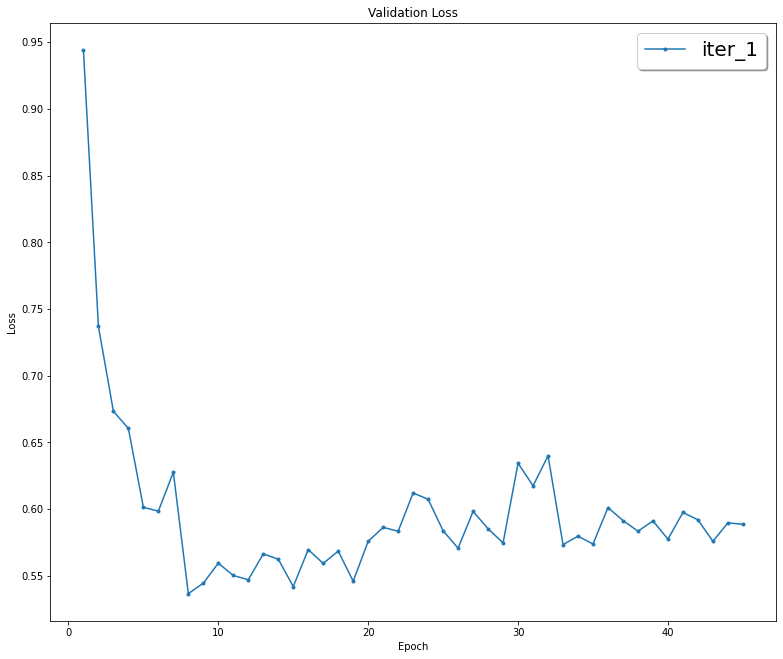

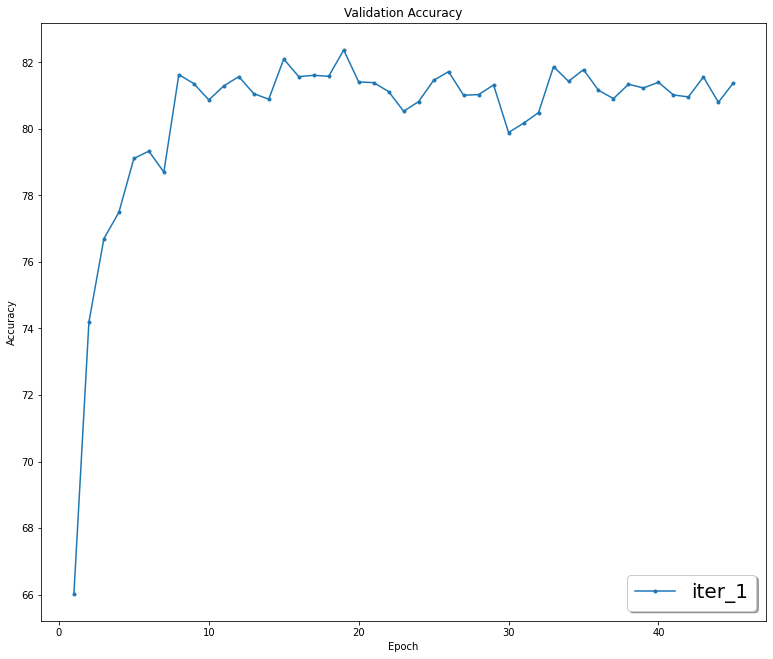

In [ ]:
# Validation loss
losses = {}
accuracies = {}
for k, v in results.items():
    losses[k] = v['test_loss']
    accuracies[k] = v['test_acc']
  
plot_metric(losses, 'Loss')
plot_metric(accuracies, 'Accuracy')

In [ ]:
path_to_model = '/content/cifar10_model.pt'
incorrect_samples = identify_misclassification(Net(), path_to_model, test_loader)

plot_results(incorrect_samples)